# Joint Two Weeks Online Certificate Programme
# Machine Learning for Computer Vision

### February 1-12, 2021
### Jointly organised by IIT Guwahati, IIT Kanpur, MNIT Jaipur, NIT Patna and PDPM IIITDM Jabalpur
Lab Sessions by: Monu Verma
#Tutorial 2: **Introduction to Image Processing in Python**

#Point processing in spatial domain
**All the processing done on the pixel values.**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [6]:
%cd drive/'My Drive'/"ColabNotebooks"

/content/drive/My Drive/ColabNotebooks


In [25]:
img= cv2.imread('cameraman.png',0) 
  
# To ascertain total numbers of  
# rows and columns of the image, 
# size of the image 
m,n=(img.shape) 


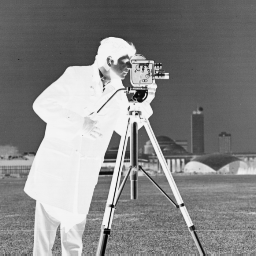

In [32]:
from google.colab.patches import cv2_imshow
# To find the maximum grey level 
# value in the image 
L = img.max() 
   
# Maximum grey level value  minus  
# the original image gives the 
# negative image 
img_neg = L-img 
   
# convert the np array img_neg to  
# a png image 
cv2.imwrite('Cameraman_Negative.png', img_neg) 
cv2_imshow(img_neg)

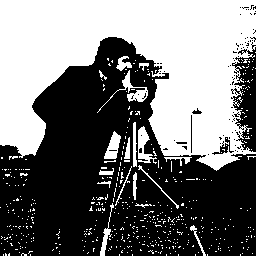

In [33]:
# Thresholding without background  
# Let threshold =T 
# Let pixel value in the original be denoted by r 
# Let pixel value in the new image be denoted by s 
# If r<T, s= 0 
# If r>T, s=255 
# m=height of the image
# n=width of the image
  
T = 150
  
# create a array of zeros 
img_thresh = np.zeros((m,n), dtype = int)  
for i in range(m): 
      
    for j in range(n): 
          
        if img[i,j] <  T:  
            img_thresh[i,j]= 0
        else: 
            img_thresh[i,j] = 255   
 # Convert array to png image 
cv2.imwrite('Cameraman_Thresh.png', img_thresh) 
cv2_imshow(img_thresh)

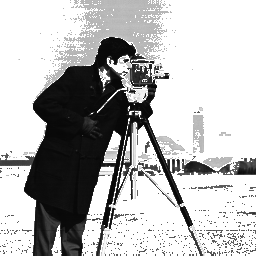

In [34]:
# the lower threshold value 
T1 = 100
  
# the upper threshold value 
T2 = 180 
  
# create a array of zeros 
img_thresh_back = np.zeros((m,n), dtype = int) 
   
for i in range(m): 
      
    for j in range(n): 
          
        if T1 < img[i,j] < T2:  
            img_thresh_back[i,j]= 255
        else: 
            img_thresh_back[i,j] = img[i,j] 
  
# Convert array to  png image 
cv2.imwrite('Cameraman_Thresh_Back.png', img_thresh_back) 
cv2_imshow(img_thresh_back)

#Log transformation
Logarithmic transformation of an image is one of the gray level image transformations. Log transformation of an image means replacing all pixel values, present in the image, with its logarithmic values. Log transformation is used for image enhancement as it expands dark pixels of the image as compared to higher pixel values.

The formula for applying log transformation in an image is,

S = c * log (1 + r)

where,
R = input pixel value,
C = scaling constant and
S = output pixel value
The value of ‘c’ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating ‘c’ is as follows:

c = 255 / (log (1 + max_input_pixel_value))
When we apply log transformation in an image and any pixel value is ‘0’ then its log value will become infinite. That’s why we are adding ‘1’ to each pixel value at the time of log transformation so that if any pixel value is ‘0’, it will become ‘1’ and its log value will be ‘0’.

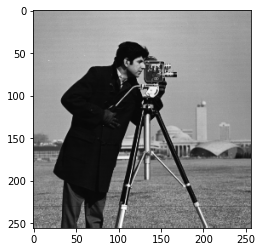

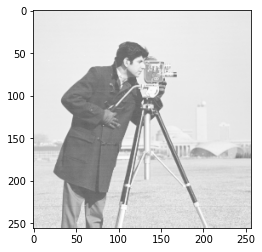

In [35]:
import matplotlib.pyplot as plt 
   
# Read an image 
image = cv2.imread('cameraman.png') 
   
# Apply log transformation method 
c = 255 / np.log(1 + np.max(image)) 
log_image = c * (np.log(image + 1)) 
   
# Specify the data type so that 
# float value will be converted to int 
log_image = np.array(log_image, dtype = np.uint8) 
   
# Display both images 
plt.imshow(image) 
plt.show() 
plt.imshow(log_image) 
plt.show() 

#Power-Law (Gamma) Transformation
Power-law (gamma) transformations can be mathematically expressed as s = cr^{\gamma}. Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings. This is done because our eyes perceive images in a gamma-shaped curve, whereas cameras capture images in a linear fashion. Below is the Python code to apply gamma correction.

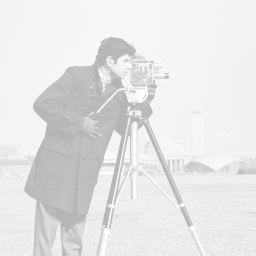

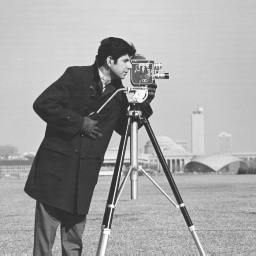

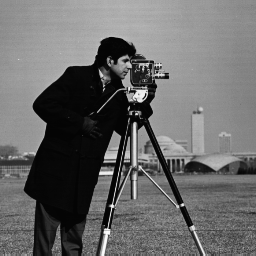

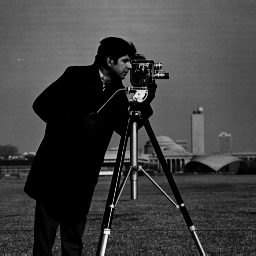

In [37]:
# Open the image. 
img = cv2.imread('cameraman.png') 
  
# Trying 4 gamma values. 
for gamma in [0.1, 0.5, 1.2, 2.2]: 
      
    # Apply gamma correction. 
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
  
    # Save edited images. 
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected) 
    cv2_imshow(gamma_corrected)

#Piecewise-Linear Transformation Functions –
These functions, as the name suggests, are not entirely linear in nature. However, they are linear between certain x-intervals. One of the most commonly used piecewise-linear transformation functions is contrast stretching.

Contrast can be defined as:

Contrast =  (I_max - I_min)/(I_max + I_min)
This process expands the range of intensity levels in an image so that it spans the full intensity of the camera/display. 

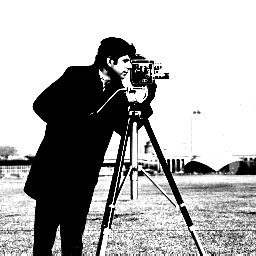

In [39]:
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
  
# Open the image. 
img = cv2.imread('cameraman.png') 
  
# Define parameters. 
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 
  
# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 
  
# Save edited image. 
cv2.imwrite('contrast_stretch.jpg', contrast_stretched) 
cv2_imshow(contrast_stretched)

** Image URL
https://www.researchgate.net/profile/Paul_Rodriguez16/publication/265988128/figure/fig1/AS:459614656438273@1486592081799/Input-test-images-a-Cameraman-grayscale-b-grayscale-Lena-and-c-color-Lena-All_Q640.jpg


**References**
1. https://www.geeksforgeeks.org/point-processing-in-image-processing-using-python-opencv/
2. https://www.geeksforgeeks.org/log-transformation-of-an-image-using-python-and-opencv/#:~:text=Log%20transformation%20of%20an%20image%20means%20replacing%20all%20pixel%20values,compared%20to%20higher%20pixel%20values.
3. https://www.geeksforgeeks.org/python-intensity-transformation-operations-on-images/

**Books**
1. https://www.pearson.com/us/higher-education/program/Gonzalez-Digital-Image-Processing-4th-Edition/PGM241219.html

2. https://books.google.co.in/books?id=JeDGn6Wmf1kC&printsec=frontcover&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false

#Tutorial By:

E&ICT Academy, MNIT Jaipur